# Source of Data Sets

#### https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data?select=features.csv.zip

# Guide Packages

In [ ]:
!pip install numpy pandas matplotlib seaborn --quiet
import os
import math
import time
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

from sklearn import metrics
from datetime import datetime
from google.colab import drive
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

!pip install pingouin
import pingouin as pg

#Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score, precision_recall_curve

     |████████████████████████████████| 182 kB 2.6 MB/s 
     |████████████████████████████████| 28.5 MB 48 kB/s 
     |████████████████████████████████| 9.8 MB 23.7 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.0-py3-none-any.whl size=193661 sha256=31c150f0a80803f1a454bcb1f3a3623f08e9d21e5631097037671b10f180ff0e
  Stored in directory: /root/.cache/pip/wheels/14/46/f9/cedd81d68d2515c24bbbd000d5b347e4fe092ccc4b568f7f70
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=95ccbdacc626c86d7c60e41f5d186a1d7e0a9c61fe7d6653ffc138e1bf3def05
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmo

# Input Dataset


In [ ]:
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/task-in/Task5/Task5-3")

Mounted at /content/drive


In [ ]:
features = pd.read_csv('/content/drive/MyDrive/task-in/Task5/Task5-3/features.csv')
stores = pd.read_csv('/content/drive/MyDrive/task-in/Task5/Task5-3/stores.csv')
train = pd.read_csv('/content/drive/MyDrive/task-in/Task5/Task5-3/train.csv')
test = pd.read_csv('/content/drive/MyDrive/task-in/Task5/Task5-3/test.csv')
sampleSubmission = pd.read_csv('/content/drive/MyDrive/task-in/Task5/Task5-3/sampleSubmission.csv')

In [ ]:
print(features.info())
print('\n')
print(stores.info())
print('\n')
print(train.info())
print('\n')
print(test.info())
print('\n')
print(sampleSubmission.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 

In [ ]:
features.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


In [ ]:
stores.head(3)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392


In [ ]:
train.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False


In [ ]:
test.head(3)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False


In [ ]:
sampleSubmission.head(3)

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0


In [ ]:
# print(features.isnull().sum())
# print('\n')
# print(stores.isnull().sum())
# print('\n')
# print(test.isnull().sum())
# print('\n')
# print(sampleSubmission.isnull().sum())
# print('\n')
# print(train.isnull().sum())

In [ ]:
print("features.shape", features.shape)
print("stores.shape", stores.shape)
print("train.shape", train.shape)
print("test.shape", test.shape)
print("submission.shape", sampleSubmission.shape)

features.shape (8190, 12)
stores.shape (45, 3)
train.shape (421570, 5)
test.shape (115064, 4)
submission.shape (115064, 2)


# Merging Data Sets


In [ ]:
feature_store = features.merge(stores, how='inner', on = "Store")
print("The number of rows and columns is: ",(feature_store.shape))
print("There are",(len(feature_store.Store.unique())), 'single stores')

train_df = train.merge(feature_store, how='inner', 
                       on = ['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)
print("The number of rows and columns is:",(train_df.shape))


test_df = test.merge(feature_store, how='inner', 
                     on = ['Store','Date','IsHoliday']).sort_values(by = ['Store','Dept','Date']).reset_index(drop=True)
print("The number of rows and columns is: ",(test_df.shape))

The number of rows and columns is:  (8190, 14)
There are 45 single stores
The number of rows and columns is: (421570, 16)
The number of rows and columns is:  (115064, 15)


In [ ]:
# feature_store.Store.unique()
# feature_store.Store

# Convert "Date" Column to Datetime Format

In [ ]:
# train_df['Date'] = pd.to_datetime(train_df['Date'])
# train_df['Day'] = train_df['Date'].dt.day
def split_date(df, date):
  df['dt_ref'] = pd.to_datetime(df[date])
  df['year'] = df.dt_ref.dt.year
  df['month'] = df.dt_ref.dt.month
  df['day'] = df.dt_ref.dt.day
  df['week_of_year'] = df.dt_ref.dt.isocalendar().week
  df['period_month'] = df.dt_ref.dt.to_period('M')   #?

   month  Weekly_Sales  IsHoliday
0      2      24924.50      False
1      2      46039.49       True
2      2      41595.55      False
3      2      19403.54      False
4      3      21827.90      False


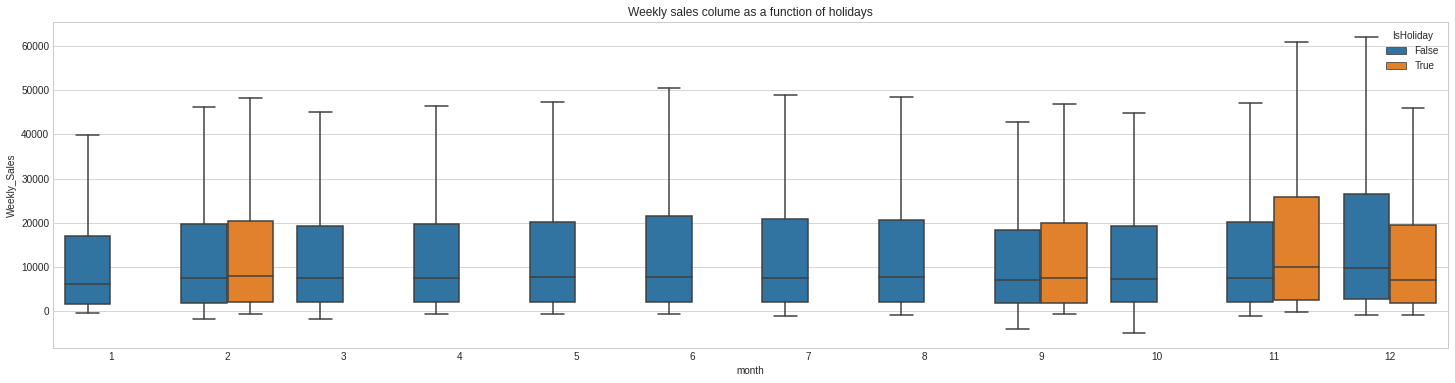

In [ ]:
# IsHoliday - whether the week is a special holiday week
# Boxplt: distribution of observation data
'''
A boxplot contains six main data nodes, which arrange a set of data from largest to smallest.
And calculate his upper edge (upper limit), upper quartile Q3, median, lower quartile Q1, lower edge(lower limit).
And an outlier respectively.
'''
split_date(train_df, 'Date')

print(train_df[['month','Weekly_Sales','IsHoliday']].head())

plt.figure(figsize = (25,6))
plt.title ('Weekly sales colume as a function of holidays')
fig = sns.boxplot(x = 'month'
                  ,y = 'Weekly_Sales'
                  ,data = train_df[['month','Weekly_Sales','IsHoliday']]
                  ,showfliers = False
                  ,hue = 'IsHoliday')


### We can investigate the variation in sales between shops and the extent to which holidays affect sales in each shop

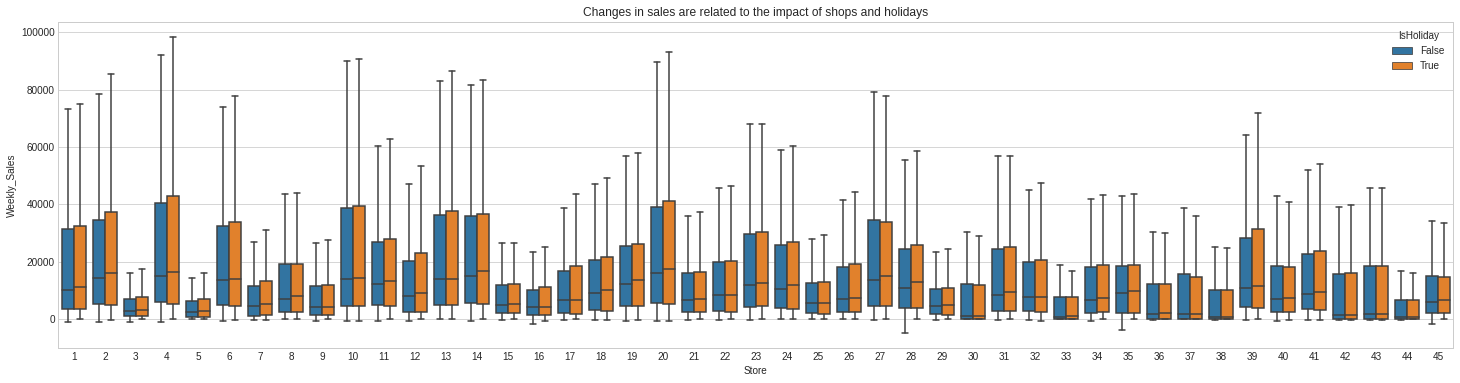

In [ ]:
plt.figure(figsize = (25,6))
plt.title ('Changes in sales are related to the impact of shops and holidays')
fig = sns.boxplot(x = 'Store'
                  ,y = 'Weekly_Sales'
                  ,data = train_df[['Store','Weekly_Sales','IsHoliday']]
                  ,showfliers = False
                  ,hue = 'IsHoliday')

### Sales per week per year

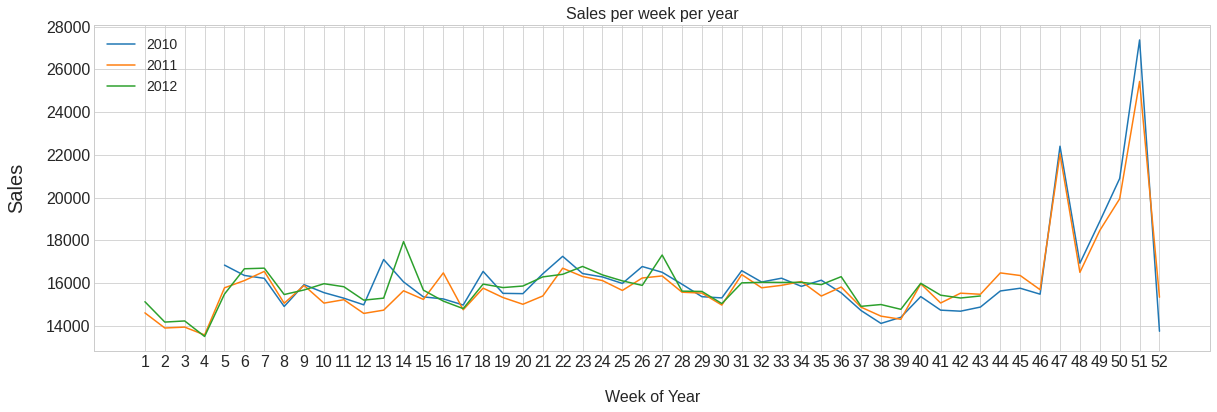

In [ ]:
weekly_sales_2010 = train_df[train_df.year==2010].groupby('week_of_year')['Weekly_Sales'].mean()
weekly_sales_2011 = train_df[train_df.year==2011].groupby('week_of_year')['Weekly_Sales'].mean()
weekly_sales_2012 = train_df[train_df.year==2012].groupby('week_of_year')['Weekly_Sales'].mean()

plt.figure(figsize=(20,6))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values)
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values)
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values)

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=16, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Sales per week per year", fontsize=16)
plt.legend(['2010', '2011', '2012'], fontsize=14);

In [ ]:
# Missing values
#train_df.isna().sum()
print(train_df.isnull().sum())
print('\n')
print(test_df.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dt_ref               0
year                 0
month                0
day                  0
week_of_year         0
period_month         0
dtype: int64


Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
dtype: int64


In [ ]:
# Missing values in 'train_df' and 'test_df' are filled in with '0' values
# However, in 'test_df', CPI and Unemployment are filled in with averages
# train_df,test_df
train_df.fillna(0, inplace = True)

test_df['CPI'].fillna(test_df['CPI'].mean(), inplace = True)
test_df['Unemployment'].fillna(test_df['Unemployment'].mean(), inplace = True)
test_df.fillna(0, inplace = True)

print(train_df.isnull().sum())
print('\n')
print(test_df.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dt_ref          0
year            0
month           0
day             0
week_of_year    0
period_month    0
dtype: int64


Store           0
Dept            0
Date            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64


In [ ]:
# train_df['IsHoliday'] = [1 if i == True else 0, i for i in train_df['IsHoliday']]
train_df['IsHoliday'] = train_df['IsHoliday'].apply(lambda x: 1 if x == True else 0)
test_df['IsHoliday'] = test_df['IsHoliday'].apply(lambda x: 1 if x == True else 0)
# print(train_df['IsHoliday'])
train_df['Type'] = train_df['Type'].apply(lambda x: 1 if x == 'A' else (2 if x == 'B' else 3))
test_df['Type'] = test_df['Type'].apply(lambda x: 1 if x == 'A' else (2 if x == 'B' else 3))
# print(train_df['Type'])

In [ ]:
# type(train_df['Date'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  object        
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  int64         
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  int64         
 15  Size          421

# Model

In [ ]:
# Dealing with data types
train_df['dt_ref'] = train_df['dt_ref'].astype(int)
train_df['period_month'] = train_df['period_month'].astype(int)  
X_f = train_df.drop(['Date','Weekly_Sales'], axis = 'columns' )
y_f = train_df['Weekly_Sales']

In [ ]:
X = train_df[[
            'Store', 'Dept','Temperature', 'Fuel_Price',
            'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 
            'MarkDown5', 'CPI','Unemployment', 'Type', 'Size',
            ]]

y = train_df['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf_model = rf.fit(X_train, y_train)

preds_train_RFR = rf_model.predict(X_train)
preds_test_RFR = rf_model.predict(X_test)

print('Mean R2 for Train is : ', metrics.mean_squared_error(y_train, preds_train_RFR, squared = False))

print('Mean R2 for Test is  : ', metrics.mean_squared_error(y_test, preds_test_RFR, squared = False))

Mean R2 for Train is :  2077.193165109014
Mean R2 for Test is  :  5112.254545123947


In [ ]:
train_score = rf.score(X_train,y_train)
test_score = rf.score(X_test,y_test)
print(train_score,test_score)

0.9916488644691654 0.949130912168538


In [ ]:
#%%time
start_time = time.time()

rf_features = RandomForestRegressor() 
rf_features.fit(X_f, y_f)

print("--- %s seconds ---" % (time.time() - start_time))

--- 503.84725046157837 seconds ---


In [ ]:
#%%time
importance_df = pd.DataFrame({
                            'feature': X_f.columns,
                            'importance': rf_features.feature_importances_
                             }).sort_values('importance', ascending=False)

CPU times: user 891 ms, sys: 2.92 ms, total: 894 ms
Wall time: 889 ms


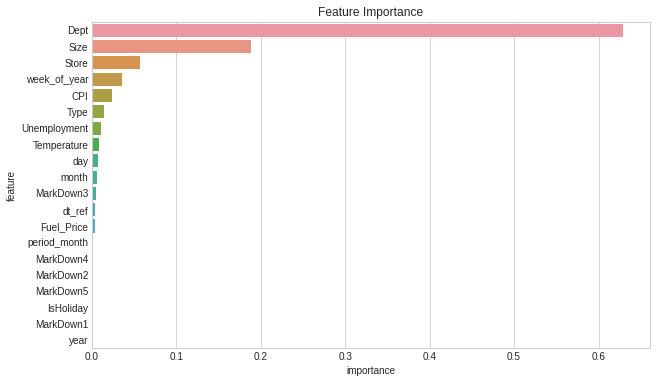

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(26), x='importance', y='feature');